In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df= pd.read_csv("NYPD_Arrest_Data__Year_to_Date__20240702.csv")
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,280255493,01/10/2024,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,M,26,0,<18,M,BLACK,996342,236149,40.814845,-73.956312,POINT (-73.956312 40.814845)
1,279805419,01/02/2024,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0,25-44,M,WHITE HISPANIC,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259)
2,279895750,01/03/2024,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Q,106,0,65+,F,WHITE,1026836,180689,40.662526,-73.846499,POINT (-73.846499 40.662526)
3,280809090,01/19/2024,511.0,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,M,B,49,0,45-64,M,BLACK,1027430,251104,40.855793,-73.843908,POINT (-73.843908 40.855793)
4,280357135,01/11/2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,K,81,2,25-44,F,BLACK,1002457,192292,40.694456,-73.934343,POINT (-73.934343 40.694456)


In [3]:
df.shape

(63621, 19)

In [4]:
infraction_count= df["PD_DESC"].value_counts()
infraction_count

PD_DESC
ASSAULT 3                         6597
LARCENY,PETIT FROM OPEN AREAS,    6526
TRAFFIC,UNCLASSIFIED MISDEMEAN    3785
ASSAULT 2,1,UNCLASSIFIED          3593
ROBBERY,OPEN AREA UNCLASSIFIED    2934
                                  ... 
IMPROPER LIGHTS                      1
NYC UNCLASSIFIED WARRANT             1
USE OF A CHILD IN A SEXUAL PER       1
SUPP. ACT TERR 2ND                   1
FACILITATION 4, CRIMINAL             1
Name: count, Length: 221, dtype: int64

In [9]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [ ]:
# Group by offense description and age group and count occurrences
crime_age_group = df.groupby(['ofns_desc', 'age_group']).size().unstack(fill_value=0)


In [ ]:
# Find the top 5 most common crimes
top_crimes = crime_age_group.sum(axis=1).nlargest(5).index


In [ ]:
# Filter the data to include only the top 5 crimes
top_crime_data = crime_age_group.loc[top_crimes]

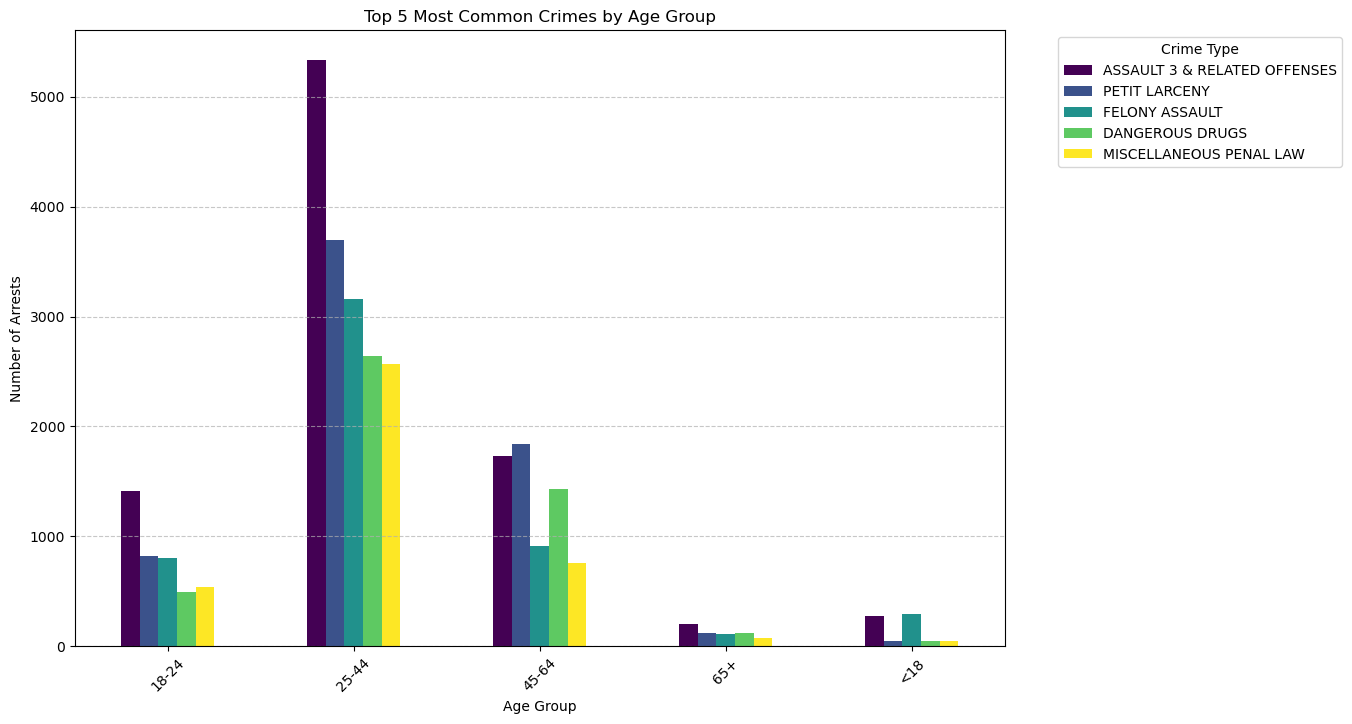

In [10]:

ax = top_crime_data.T.plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title('Top 5 Most Common Crimes by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45)

plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

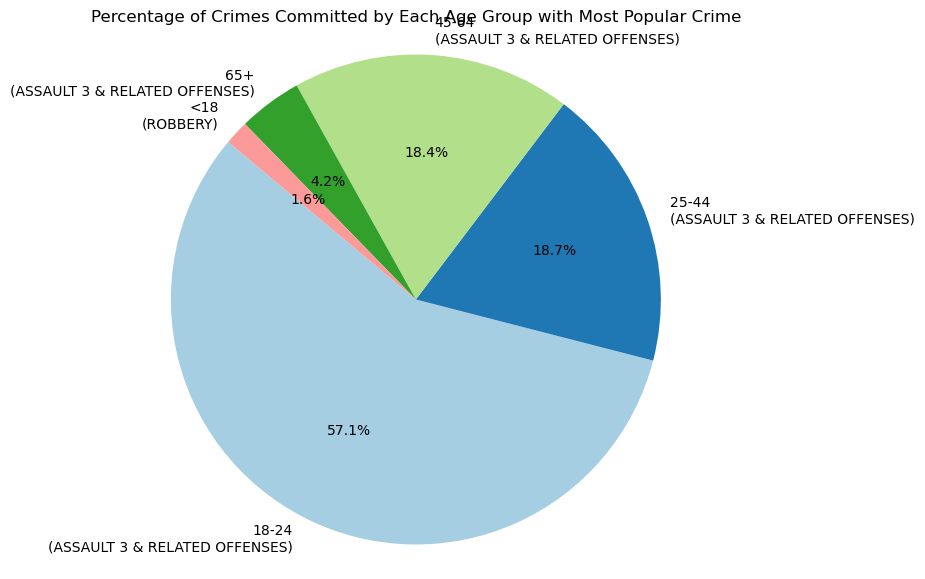

In [11]:
# Group by age group and count occurrences
age_group_counts = df['age_group'].value_counts()

# Find the most popular crime for each age group
most_common_crimes = df.groupby('age_group')['ofns_desc'].agg(lambda x: x.value_counts().index[0])

# Combine the counts and most common crimes into labels
labels = [f'{age_group}\n({crime})' for age_group, crime in most_common_crimes.items()]

# Plot the pie chart
plt.figure(figsize=(10, 7))
plt.pie(age_group_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Percentage of Crimes Committed by Each Age Group with Most Popular Crime')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [12]:
import pandas as pd

# Load the data into a DataFrame
url = "https://data.cityofnewyork.us/resource/uip8-fykc.csv"
df = pd.read_csv(url)

# Clean column names (if necessary)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Count the number of unique crime types
num_unique_crimes = df['ofns_desc'].nunique()

print(f'There are {num_unique_crimes} different types of crimes listed in the dataset.')

There are 43 different types of crimes listed in the dataset.
